
---

**Desafio 01: Proporção de inscritos por idade** <br>
**Desafio 02: Descobrir de quais estados são os inscritos com 13 anos** <br>
**Desafio 03: Adicionar os títulos no hist()** <br>
**Desafio 04: Plotar os histogramas das idades dos treineiros e não treineiros** <br>
**Desafio 05: Comparar as distrubuições das provas em inglês e espanhol** <br>
**Desafio 06: Explorar a documentação do matplotlib e fazer algo novo**

---

In [123]:
import pandas as pd

dados = pd.read_csv("https://github.com/alura-cursos/imersao-dados-2-2020/blob/master/MICRODADOS_ENEM_2019_SAMPLE_43278.csv?raw=true")

# **Tabela Geral**

In [219]:
dados.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,...,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,190001004661,2019,1506138,Redenção,15,PA,17,M,1,3,1,1506138.0,Redenção,15.0,PA,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,ACAEAAACABEBABAADCEEEDE*CBDCCCADADCCCBEBBBBDB,99999CCCABBCAADDBCEBCCADBEEBDECBAABDEACACAEABB...,DEEDCAECDDEEECBCBECABEBAECBBCDAECAEBBBBBDCCDB,1,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,60.0,100.0,80.0,80.0,100.0,420.0,B,B,A,A,4,B,A,C,B,A,C,B,A,A,A,A,A,A,A,B,A,C,A,B,B
1,190001004674,2019,1504208,Marabá,15,PA,23,M,1,3,1,1504208.0,Marabá,15.0,PA,1,3,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,ABBCEADCEBAAACACEDCDCDACCCACDCBCABCAACBDBDEDE,99999ABCEBCEDDECEEEBBCCEECCABDABEEBCDEAEBBEAEA...,NaN,1,NaN,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,NaN,1.0,80.0,100.0,80.0,80.0,60.0,400.0,C,C,A,A,4,B,A,B,C,A,A,B,B,B,A,A,A,A,B,A,A,B,A,A,B
2,190001004722,2019,1501402,Belém,15,PA,35,F,2,1,1,1501402.0,Belém,15.0,PA,1,12,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,CDCAACCAAADEACBBEBAAEECDABDEBAEAABEDCABABAABC,99999ECBCECEBBABECCCECECCEECCDECEEEDADDDDECEDD...,DDBEADEBBCADCEEACABECBCEBADECADCEDAACBDABABCE,1,AAECACDEADCBCDDDBCBDADAEABCEBABEEBCBEECEBDADC,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,EEEADBEBACABCDBABECECACDCBDCCEDCDABEDECDDDBAA,1.0,100.0,120.0,120.0,100.0,120.0,560.0,C,A,B,B,5,C,A,B,C,A,A,B,A,B,A,A,A,A,B,A,B,B,A,A,B
3,190001004735,2019,1507300,São Félix do Xingu,15,PA,23,F,1,3,1,1505437.0,Ourilândia do Norte,15.0,PA,1,7,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,EECCCEDBADBEAAAAEBAECEAAAAEEEBACCAC*CEAEDAECE,99999BABCDABBCBDDAAECADBDDADDCBCEEDCAEBCEAEABD...,CBDEBBCBDEBCABCDBDEDADCCBEDBCAECEBEBDEBAEECBC,1,BEEAAEBEEBADEADDADAEABCEDDDBCBCBCCACBCDADCCEB,EEBCEEDBADBBCBABCCADCEBACDBBACCACACBEADBBADCB,ADBBEDCABAABBCBCDAAECDDDBAAAECADECDCEBDEEAECBD...,BEDEEEAADBEBACABCDBABECECACADCBDCCEDCDABECDDD,1.0,100.0,120.0,120.0,120.0,40.0,500.0,E,C,A,A,1,B,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,B,A,A,B
4,190001004776,2019,1500800,Ananindeua,15,PA,16,F,1,3,1,1500800.0,Ananindeua,15.0,PA,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,CCBCBEACABACABBBBACCBCEBDCBABCADADCBCADBAADEA,EBCAB99999BBCECBCACBEACBDAABDBCBBDACEBBACDCAEC...,AECCBBCBBCBDEDECACBAABEDABBEDDADCEADDBEBDBBEB,0,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,160.0,140.0,160.0,160.0,160.0,780.0,E,E,B,D,3,E,A,B,C,B,A,B,A,A,A,A,A,A,B,A,A,D,A,A,B


In [220]:
dados.shape

(127380, 136)

**Títulos das colunas**

In [221]:
dados.columns.values

array(['NU_INSCRICAO', 'NU_ANO', 'CO_MUNICIPIO_RESIDENCIA',
       'NO_MUNICIPIO_RESIDENCIA', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA',
       'NU_IDADE', 'TP_SEXO', 'TP_ESTADO_CIVIL', 'TP_COR_RACA',
       'TP_NACIONALIDADE', 'CO_MUNICIPIO_NASCIMENTO',
       'NO_MUNICIPIO_NASCIMENTO', 'CO_UF_NASCIMENTO', 'SG_UF_NASCIMENTO',
       'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO',
       'IN_TREINEIRO', 'CO_ESCOLA', 'CO_MUNICIPIO_ESC',
       'NO_MUNICIPIO_ESC', 'CO_UF_ESC', 'SG_UF_ESC',
       'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC',
       'IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_SURDEZ',
       'IN_DEFICIENCIA_AUDITIVA', 'IN_SURDO_CEGUEIRA',
       'IN_DEFICIENCIA_FISICA', 'IN_DEFICIENCIA_MENTAL',
       'IN_DEFICIT_ATENCAO', 'IN_DISLEXIA', 'IN_DISCALCULIA',
       'IN_AUTISMO', 'IN_VISAO_MONOCULAR', 'IN_OUTRA_DEF', 'IN_GESTANTE',
       'IN_LACTANTE', 'IN_IDOSO', 'IN_ESTUDA_CLASSE_HOSPITALAR',
       'IN_SEM_RECURSO', 'IN_BRAILLE', 'IN_AMPLIADA_24

# **Desafio 1 - Inscritos por idade**




Aplicação da formula de porcentagem, a truque é conseguir pegar os valores de idade, interessante como ao retornarmos uma tabela para a variável e realizarmos operações matematicas com a variável ele pula o index e aplica diretamente no valor. Poderíamos ter feito sem variáveis também, chamando os valores direto na formula. <br> Trade off - Memória + Linhas de código confusas


In [176]:
participantes = len(dados)
idades = dados["NU_IDADE"].value_counts()
(idades / participantes) *100

18    16.840948
17    16.687078
19    11.318888
20     8.174753
16     6.146962
        ...    
75     0.001570
73     0.001570
82     0.000785
77     0.000785
76     0.000785
Name: NU_IDADE, Length: 65, dtype: float64

A porcentagem mostra a esmagadora presença do ENEM entre a população entre 16-20 anos, que deixa a escola e busca ingressar em uma faculdade. Um gráfico traria uma ideia melhor, mas espera-se uma curva descendo em direção ao eixo x sem maiores alterações.

# **Desafio 2 - As UFs dos inscritos com 13 anos**

In [ ]:
dados["NU_IDADE"].value_counts().sort_index()

13        4
14      141
15     2009
16     7830
17    21256
      ...  
73        2
75        2
76        1
77        1
82        1
Name: NU_IDADE, Length: 65, dtype: int64

Eu sei que há 4 pessoas de 13 anos, logo em uma tabela separada indexada por idadade serão os 4 primeiros. Chamo essa tabela com idade e UF de residência e peço somente os 4 primeiros itens.

In [ ]:

dados[["NU_IDADE", "SG_UF_RESIDENCIA"]].value_counts().sort_index().head(4)

NU_IDADE  SG_UF_RESIDENCIA
13        AP                  1
          BA                  1
          MT                  1
          SP                  1
dtype: int64

Uma melhor solução é:

In [ ]:
dados.query("NU_IDADE == 13")["SG_UF_RESIDENCIA"]

57359     SP
95630     MT
98197     AP
116501    BA
Name: SG_UF_RESIDENCIA, dtype: object

Assim achamos qualquer valor de idade independente de seu valor(na primeira só achamos pq 13 é o menor) e ainda temos o index da tabela geral em que estão guardados esses dados. 

Também podemos adicionar a função value_counts ao final para receber somente quantos temos com 13 anos para cada estado, simplificando a tabela quando lidando com grandes quantidades de dados, pois não haverá repetições por UF

In [ ]:
dados.query("NU_IDADE == 13")["SG_UF_RESIDENCIA"].value_counts()

SP    1
BA    1
AP    1
MT    1
Name: SG_UF_RESIDENCIA, dtype: int64

ou:

In [173]:
dados[dados["NU_IDADE"] == 13]['SG_UF_RESIDENCIA'].value_counts()

SP    1
BA    1
AP    1
MT    1
Name: SG_UF_RESIDENCIA, dtype: int64

Nada para analisar.

# **Desafio 3 - Títulos no hist()**


Simples adição de titulo à tabela. Uma pesquisa na documentação para saber qual atributo utilizar

Text(0.5, 1.0, 'Notas da Redação')

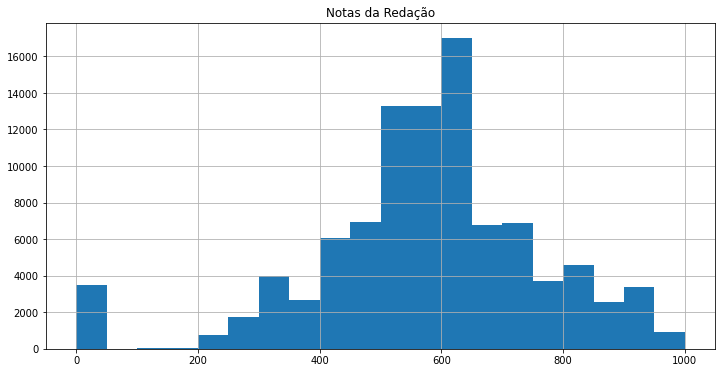

In [8]:
dados["NU_NOTA_REDACAO"].hist(bins = 20, figsize = (12,6)).set_title("Notas da Redação")

Aproveitando a oportunidade para análise, nota-se o grande número de 0s em relação as notas entre 100 e 400. A maioria dos candidatos se encontra na faixa 500-650. Do 750 ao 1000 o número parece cair mais devagar, sem um grande pico como perto do desvio padrão.

# **Desafio 4 - Hist()s para idades de Treineiros = 0 e = 1**


Aqui o desafio é aprender a usar o matplotlib para colocar gráficos lado a lado. A biblioteca faz isso os colocando dentro de uma caixa maior. Os primeiros parâmetros do atributo subplots são linhas e colunas.

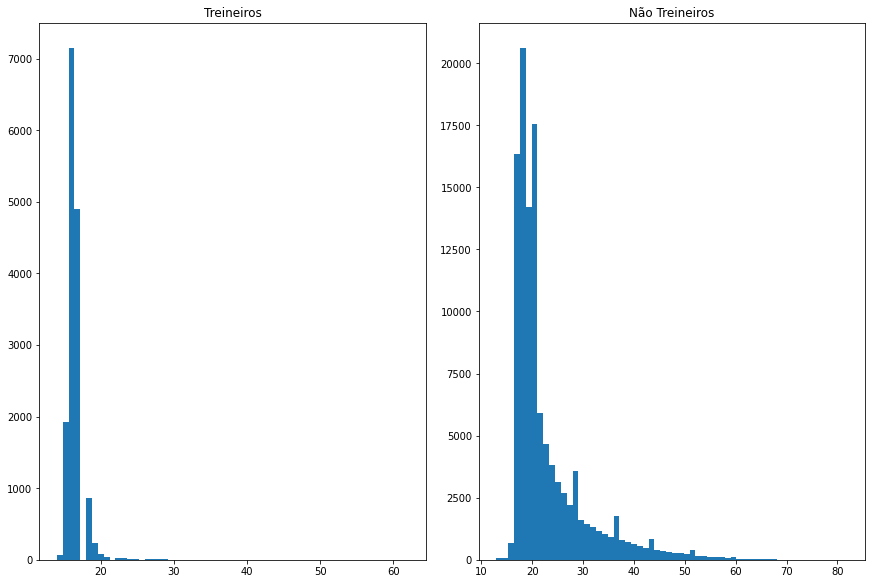

In [110]:
import matplotlib.pyplot as plt

n_bins = 60
fig, [ax0, ax1] = plt.subplots(1, 2, constrained_layout=True, figsize=(12,8))

ax0.hist(dados.query("IN_TREINEIRO == 1")["NU_IDADE"], n_bins)
ax0.set_title("Treineiros")

ax1.hist(dados.query("IN_TREINEIRO == 0")["NU_IDADE"], n_bins)
ax1.set_title("Não Treineiros")

plt.show()

A comparação mostra que o número de treineiros é bem maior entre 13-16 anos, e cai radicalmente dos 17 em diante. Após os 25 a curva tem uma regressão que lembra a segunda metade de uma distribuição normal.

# **Desafio 5 - Distribuição das notas na escolha Inglês / Espanhol**

Acredito que boxplot seja um gráfico bom de se avaliar a distribuição das notas, entregando mediana, quartis, desvio padrão e min, max. <br>
Assim como no desafio 4, para mantermos os dois gráficos em um grid importamos a matplotlib. Passando a conta dos valores de nota dos que fizeram a prova de inglês para um gráfico e de espanhol para o outro. <br>
O atributo subplot com sharey, e constrained layout ajuda a deixar os gráficos próximos e alinhados, facilitando a comparação, assim como color os diferencia ao olhar.

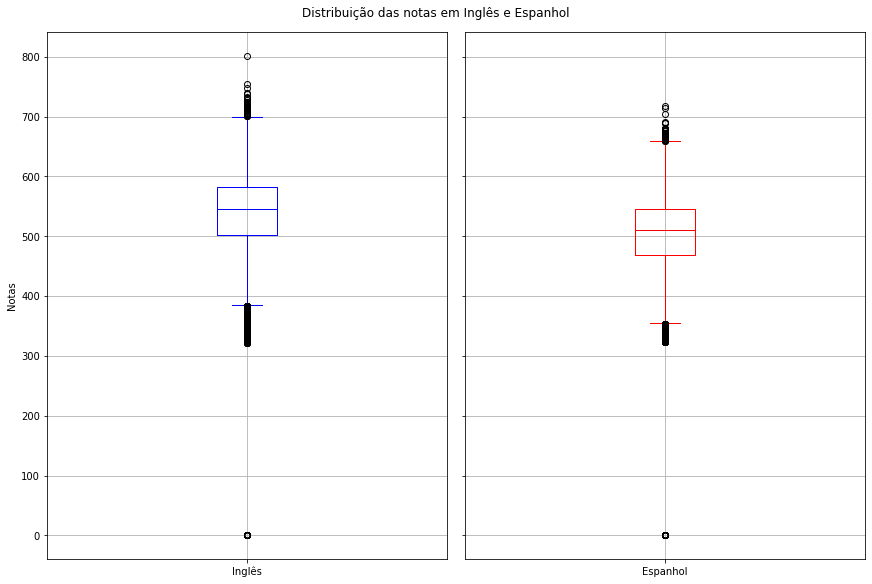

In [215]:
import matplotlib.pyplot as plt

en = dados.query("TP_LINGUA == 0")["NU_NOTA_LC"]
spn = dados.query("TP_LINGUA == 1")["NU_NOTA_LC"]

fig, axes = plt.subplots(1, 2, figsize=(12,8), sharey = True, constrained_layout = True)
fig.suptitle("Distribuição das notas em Inglês e Espanhol")
en.plot.box(ax = axes[0], ylabel = "Notas", label = "Inglês", grid = True, color = "blue")
spn.plot.box(ax = axes[1], label = "Espanhol", grid = True, color = "red")

Nota-se que as distribuições são parecidas. Porém na prova de Espanhol há menos notas altas e mais notas no segundo quartil.

# **Desafio 6 - Algo novo com Matplotlib**

Pode se dizer que isso já foi feito no 4 e 5, mas vou assumir que deve ser feito algo a mais para o desafio 6. Ainda assim sendo justo, aqui vai qualquer coisa nova.

Text(0.5, 1.0, 'Notas da Redação')

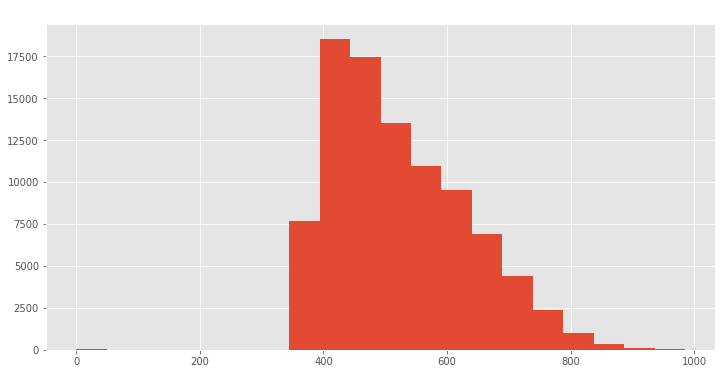

In [231]:
import matplotlib as mpl

mpl.style.use(['dark_background', 'ggplot', 'fast'])

dados["NU_NOTA_MT"].hist(bins = 20, figsize = (12,6)).set_title("Notas da Redação")

Mais impressionante que mudar a cor do gráfico são tão poucas notas baixas em matemática.